<a href="https://colab.research.google.com/github/Formalemon/MNIST/blob/main/mnist-model-and-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Step 2: Load the dataset
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()
x = np.concatenate((x_tr, x_te), axis=0)
y = np.concatenate((y_tr, y_te), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Data preprocessing
# Normalize the pixel values of the images between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the target variable into one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# Step 4: Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
438/438 [==============================] - 6s 9ms/step - loss: 0.4119 - accuracy: 0.8773 - val_loss: 0.1718 - val_accuracy: 0.9494
Epoch 2/10
438/438 [==============================] - 2s 4ms/step - loss: 0.1748 - accuracy: 0.9472 - val_loss: 0.1255 - val_accuracy: 0.9610
Epoch 3/10
438/438 [==============================] - 2s 4ms/step - loss: 0.1299 - accuracy: 0.9604 - val_loss: 0.1070 - val_accuracy: 0.9676
Epoch 4/10
438/438 [==============================] - 2s 4ms/step - loss: 0.1072 - accuracy: 0.9674 - val_loss: 0.0932 - val_accuracy: 0.9723
Epoch 5/10
438/438 [==============================] - 3s 7ms/step - loss: 0.0906 - accuracy: 0.9721 - val_loss: 0.0930 - val_accuracy: 0.9726
Epoch 6/10
438/438 [==============================] - 4s 8ms/step - loss: 0.0803 - accuracy: 0.9746 - val_loss: 0.0876 - val_accuracy: 0.9747
Epoch 7/10
438/438 [==============================] - 3s 7ms/step - loss: 0.0715 - accuracy: 0.9774 - val_loss: 0.0810 - val_accuracy: 0.9760
Epoch 

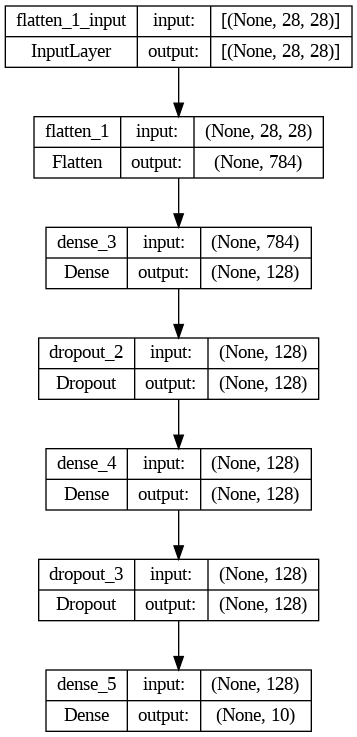

In [5]:
from tensorflow.keras.utils import plot_model

# visualize the model
plot_model(model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)

438/438 - 1s - loss: 0.0828 - accuracy: 0.9769 - 853ms/epoch - 2ms/step
Test loss: 0.0828
Test accuracy: 0.9769


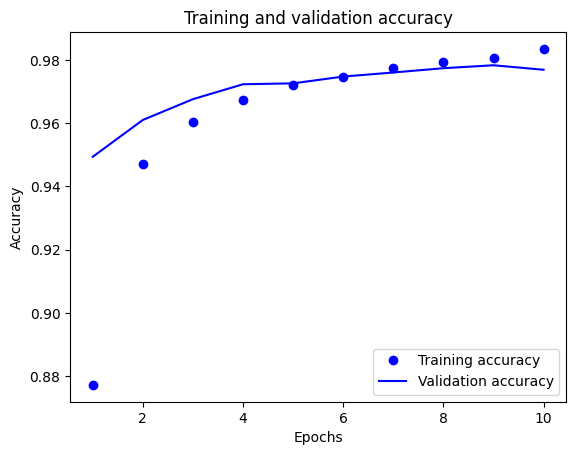

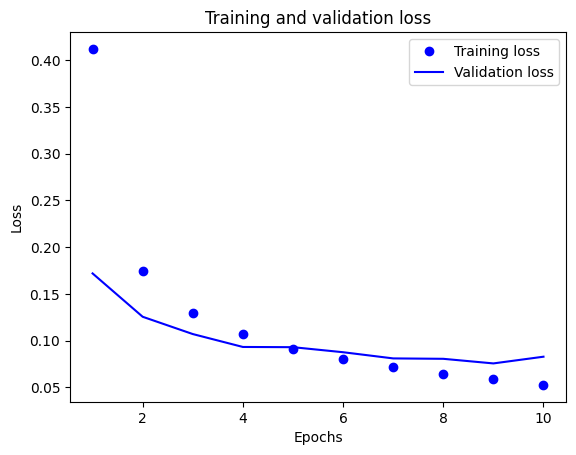

In [6]:
# Step 7: Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

# Step 8: Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

438/438 [==============================] - 1s 2ms/step


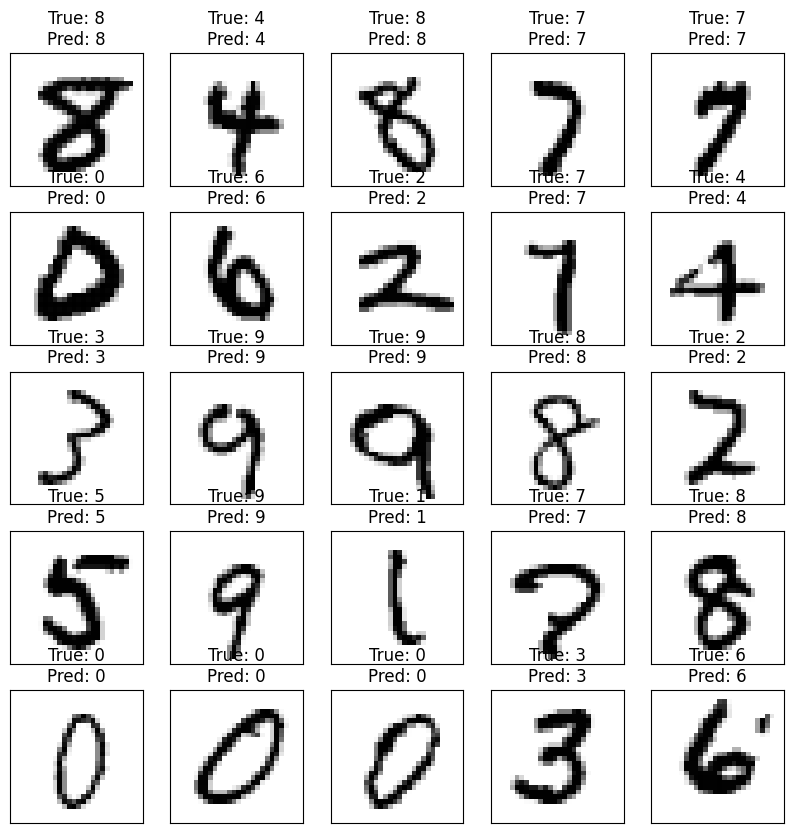

In [7]:
# Make predictions on test data
y_pred = model.predict(x_test)
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    # Display image
    ax.imshow(x_test[i].reshape(28, 28), cmap='binary')

    # Show true and predicted classes
    true_label = y_test[i].argmax()
    pred_label = y_pred[i].argmax()
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")

    # Remove ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Convert one-hot encoded test labels to integers
y_test_classes = np.argmax(y_test, axis=1)

# Get predicted classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
print(classification_report(y_test_classes, y_pred_classes))
print('Accuracy:', accuracy_score(y_test_classes, y_pred_classes))

conf_mat = confusion_matrix(y_test_classes, y_pred_classes)
print('Confusion Matrix:\n', conf_mat)

# Initialize variables for computing average metrics
avg_specificity = 0
avg_sensitivity = 0
avg_accuracy = 0
avg_precision = 0
avg_FPR = 0
avg_FNR = 0
avg_NPV = 0
avg_FDR = 0
avg_F1_score = 0
avg_MCC = 0

# Compute class-specific metrics
for i in range(conf_mat.shape[0]):
    TP = conf_mat[i,i]
    FP = np.sum(conf_mat[:,i]) - TP
    FN = np.sum(conf_mat[i,:]) - TP
    TN = np.sum(conf_mat) - TP - FP - FN

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    NPV = TN / (TN + FN)
    FDR = FP / (TP + FP)
    F1_score = 2 * precision * sensitivity / (precision + sensitivity)
    MCC = (TP*TN - FP*FN) / np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

    avg_specificity += specificity
    avg_sensitivity += sensitivity
    avg_accuracy += accuracy
    avg_precision += precision
    avg_FPR += FPR
    avg_FNR += FNR
    avg_NPV += NPV
    avg_FDR += FDR
    avg_F1_score += F1_score
    avg_MCC += MCC

# Print average metrics
print('\nAverage Metrics:')
print(f'Specificity: {avg_specificity / 10:.4f}')
print(f'Sensitivity: {avg_sensitivity / 10:.4f}')
print(f'Accuracy: {avg_accuracy / 10:.4f}')
print(f'Precision: {avg_precision / 10:.4f}')
print(f'FPR: {avg_FDR / 10:.4f}')
print(f'FNR: {avg_FNR / 10:.4f}')
print(f'NPV: {avg_NPV / 10:.4f}')
print(f'FDR: {avg_FDR / 10:.4f}')
print(f'F1-Score: {avg_F1_score / 10:.4f}')
print(f'MCC: {avg_MCC / 10:.4f}')

438/438 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.96      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.98      1295
           5       0.99      0.97      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.97      0.98      0.98      1503
           8       0.98      0.95      0.96      1357
           9       0.97      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

Accuracy: 0.9768571428571429
Confusion Matrix:
 [[1327    0    5    0    1    0    3    2    5    0]
 [   0 1589    1    2    1    0    1    5    1    0]
 [   1    9 1352    4    2    1 

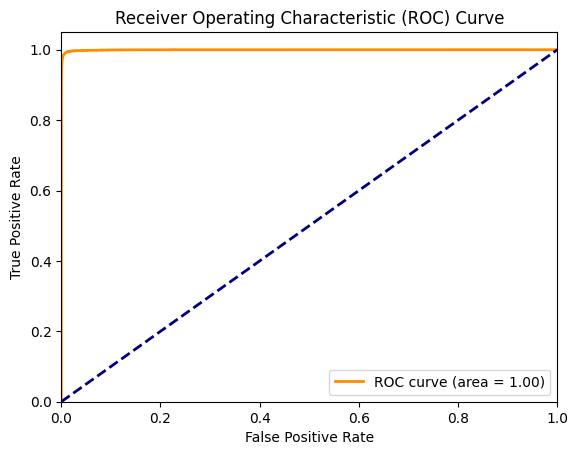

In [9]:
# Step 7: Evaluate the model
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

# Step 8: Visualize the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

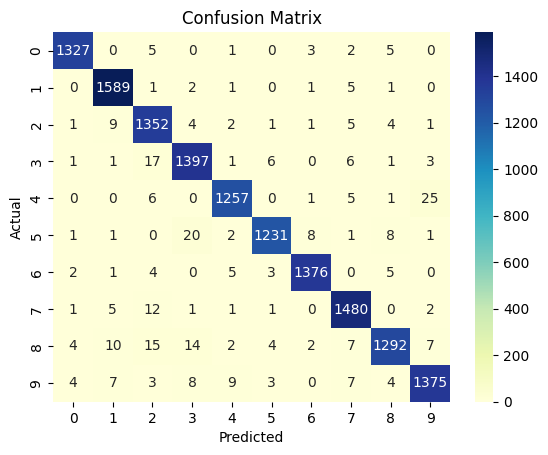

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
y_true = np.argmax(y_test,axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)

# plot heatmap of confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

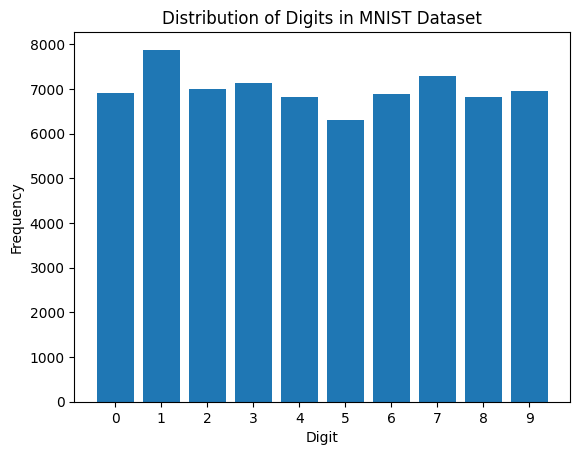

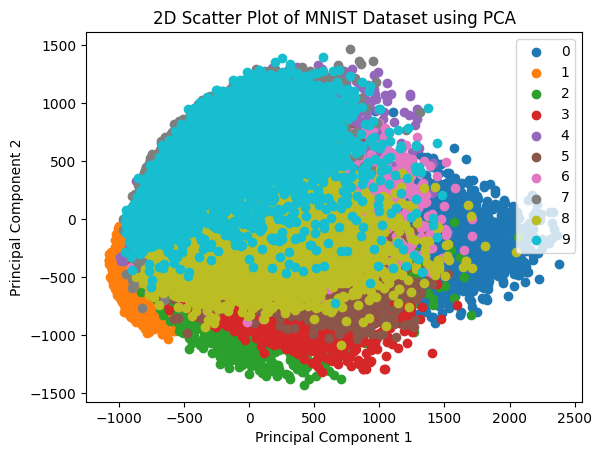

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Plot a histogram of the frequency of each digit in the dataset
fig, ax = plt.subplots()
ax.hist(y, bins=np.arange(11)-0.5, rwidth=0.8)
ax.set_xticks(range(10))
ax.set_xlabel('Digit')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Digits in MNIST Dataset')
plt.show()

# Perform PCA to reduce the dimensionality of the dataset to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x.reshape((x.shape[0], -1)))

# Plot a 2D scatter plot of the first two principal components
fig, ax = plt.subplots()
for i in range(10):
    ax.scatter(x_pca[y == i, 0], x_pca[y == i, 1], label=str(i))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Scatter Plot of MNIST Dataset using PCA')
ax.legend()
plt.show()

In [12]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=8b1587b7589b938ef12ecf27d570d5233bd87fd0fdc591842c8aa7aba63618a9
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=952b17872f95c94538695d79bebac24f4307a0baf7841260fe6da4780b3d6d75
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


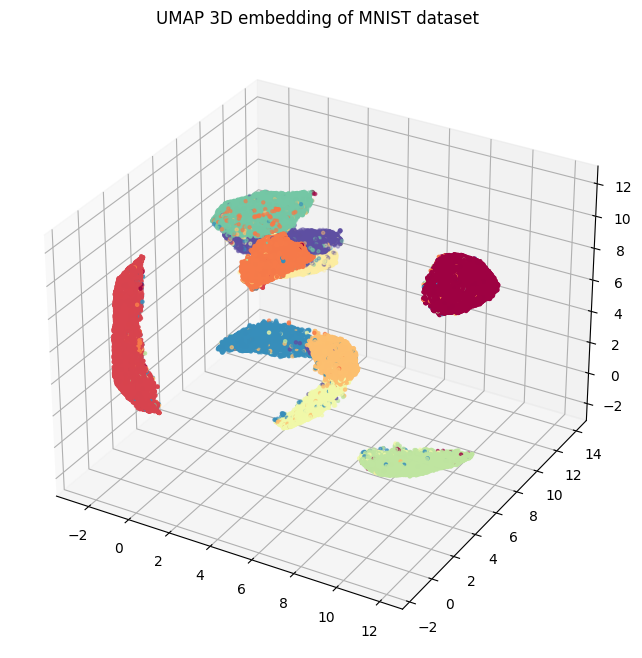

In [13]:
import umap

# Reshape the images to 1D vectors
x = x.reshape((x.shape[0], -1))

# Perform dimensionality reduction using UMAP
umap_3d = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=3, random_state=42)
embedding = umap_3d.fit_transform(x)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=y, cmap='Spectral', s=5)
ax.set_title("UMAP 3D embedding of MNIST dataset")
plt.show()